# Importando datasets de radares

In [27]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [28]:
ufs = ['RS', 'SC', 'PR']

In [29]:
df_antt = pd.read_excel("../dados/loc_radar/radares_antt_com_data.xlsx")
df_antt.head()

,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf,km_m,municipio,tipo_pista,sentido,situacao,data_da_inativacao,latitude,longitude,velocidade_leve,velocidade_pesado,ativacao_mes,ativacao_ano
0,AUTOPISTA LITORAL SUL,2009,Redutor,BR-376,PR,664.773,Guaratuba,Principal,Crescente,Ativo,NaN,-25.8582,-48.9512,60,60,10.0,2013.0
1,AUTOPISTA LITORAL SUL,2009,Redutor,BR-376,PR,667.013,Guaratuba,Principal,Crescente,Ativo,NaN,-25.8637,-48.9348,60,60,10.0,2013.0
2,AUTOPISTA LITORAL SUL,2009,Redutor,BR-376,PR,668.334,Guaratuba,Principal,Crescente,Ativo,NaN,-25.8693,-48.9341,60,60,7.0,2011.0
3,AUTOPISTA LITORAL SUL,2009,Redutor,BR-376,PR,668.880,Guaratuba,Principal,Decrescente,Ativo,NaN,-25.8749,-48.9363,60,60,10.0,2013.0
4,AUTOPISTA LITORAL SUL,2009,Redutor,BR-101,SC,48.770,Joinville,Principal,Crescente,Ativo,NaN,-26.3802,-48.8516,80,80,3.0,2014.0


In [30]:
df_antt = df_antt.dropna(subset=['latitude', 'longitude'])
#df_antt['latitude'] = df_antt['latitude'].str.replace(',', '.')
#df_antt['longitude'] = df_antt['longitude'].str.replace(',', '.')

df_antt['latitude'] = pd.to_numeric(df_antt['latitude'], errors='coerce')
df_antt['longitude'] = pd.to_numeric(df_antt['longitude'], errors='coerce')
df_antt["ativacao_mes"] = df_antt["ativacao_mes"].astype("Int64")
df_antt["ativacao_ano"] = df_antt["ativacao_ano"].astype("Int64")
df_antt = df_antt[df_antt['uf'].isin(ufs)]

df_antt = df_antt.dropna(subset=['latitude'])
df_antt = df_antt.dropna(subset=['longitude'])

df_antt.head()

,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf,km_m,municipio,tipo_pista,sentido,situacao,data_da_inativacao,latitude,longitude,velocidade_leve,velocidade_pesado,ativacao_mes,ativacao_ano
0,AUTOPISTA LITORAL SUL,2009,Redutor,BR-376,PR,664.773,Guaratuba,Principal,Crescente,Ativo,NaN,-25.8582,-48.9512,60,60,10,2013
1,AUTOPISTA LITORAL SUL,2009,Redutor,BR-376,PR,667.013,Guaratuba,Principal,Crescente,Ativo,NaN,-25.8637,-48.9348,60,60,10,2013
2,AUTOPISTA LITORAL SUL,2009,Redutor,BR-376,PR,668.334,Guaratuba,Principal,Crescente,Ativo,NaN,-25.8693,-48.9341,60,60,7,2011
3,AUTOPISTA LITORAL SUL,2009,Redutor,BR-376,PR,668.880,Guaratuba,Principal,Decrescente,Ativo,NaN,-25.8749,-48.9363,60,60,10,2013
4,AUTOPISTA LITORAL SUL,2009,Redutor,BR-101,SC,48.770,Joinville,Principal,Crescente,Ativo,NaN,-26.3802,-48.8516,80,80,3,2014


In [31]:
df_dnit = pd.read_excel("../dados/loc_radar/radares_dnit_com data.xlsx")
df_dnit.head()

,Código do Equipamento,Equipamento,UF,Município,Rodovia,Km,Coordenadas,Registro INMETRO,Nº de Série,ativacao_mes,ativacao_ano
0,SCB20010001,Redutor Eletrônico de Velocidade,SC,BOM RETIRO,282,127.960,"-49.487068, -27.803703",14794301,6042,6,2020
1,SCB20010002,Redutor Eletrônico de Velocidade,SC,BOM RETIRO,282,128.275,"-49.49019, -27.803961",14794302,6043,6,2020
2,SCB20010003,Redutor Eletrônico de Velocidade,SC,LAGES,282,215.255,"-50.282411, -27.79415",14794315,6046,6,2020
3,SCB20010007,Redutor Eletrônico de Velocidade,SC,LAGES,282,218.510,"-50.3145, -27.796972",14794310,6052,6,2020
4,SCB20010008,Redutor Eletrônico de Velocidade,SC,LAGES,282,218.550,"-50.3147, -27.797219",14794313,6053,6,2020


In [32]:
df_dnit[['longitude', 'latitude']] = df_dnit['Coordenadas'].str.replace(' ', '').str.split(',', expand=True)
df_dnit['latitude'] = pd.to_numeric(df_dnit['latitude'], errors='coerce')
df_dnit['longitude'] = pd.to_numeric(df_dnit['longitude'], errors='coerce')
df_dnit = df_dnit[df_dnit['UF'].isin(ufs)]

df_dnit = df_dnit.dropna(subset=['latitude'])
df_dnit = df_dnit.dropna(subset=['longitude'])

df_dnit.head()

,Código do Equipamento,Equipamento,UF,Município,Rodovia,Km,Coordenadas,Registro INMETRO,Nº de Série,ativacao_mes,ativacao_ano,longitude,latitude
0,SCB20010001,Redutor Eletrônico de Velocidade,SC,BOM RETIRO,282,127.960,"-49.487068, -27.803703",14794301,6042,6,2020,-49.487068,-27.803703
1,SCB20010002,Redutor Eletrônico de Velocidade,SC,BOM RETIRO,282,128.275,"-49.49019, -27.803961",14794302,6043,6,2020,-49.490190,-27.803961
2,SCB20010003,Redutor Eletrônico de Velocidade,SC,LAGES,282,215.255,"-50.282411, -27.79415",14794315,6046,6,2020,-50.282411,-27.794150
3,SCB20010007,Redutor Eletrônico de Velocidade,SC,LAGES,282,218.510,"-50.3145, -27.796972",14794310,6052,6,2020,-50.314500,-27.796972
4,SCB20010008,Redutor Eletrônico de Velocidade,SC,LAGES,282,218.550,"-50.3147, -27.797219",14794313,6053,6,2020,-50.314700,-27.797219


In [33]:
df_antt.shape

(207, 17)

In [34]:
df_dnit.shape

(467, 13)

In [35]:
df_2025_ocorrencia = pd.read_csv("../dados/acidentes/por ocorrencia/datatran_agrupado.csv",sep=",")

df_2025_ocorrencia = df_2025_ocorrencia[df_2025_ocorrencia['uf'].isin(ufs)]

df_2025_ocorrencia['latitude'] = df_2025_ocorrencia['latitude'].str.replace(',', '.')
df_2025_ocorrencia['longitude'] = df_2025_ocorrencia['longitude'].str.replace(',', '.')

df_2025_ocorrencia['latitude'] = pd.to_numeric(df_2025_ocorrencia['latitude'], errors='coerce')
df_2025_ocorrencia['longitude'] = pd.to_numeric(df_2025_ocorrencia['longitude'], errors='coerce')

df_2025_ocorrencia = df_2025_ocorrencia.dropna(subset=['latitude'])
df_2025_ocorrencia = df_2025_ocorrencia.dropna(subset=['longitude'])

df_2025_ocorrencia.head()

C:\Users\adria\AppData\Local\Temp\ipykernel_6164\4142165073.py:1: DtypeWarning: Columns (25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2025_ocorrencia = pd.read_csv("../dados/acidentes/por ocorrencia/datatran_agrupado.csv",sep=",")


,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,origem_arquivo
1,405158.0,2022-01-01,sábado,02:40:00,PR,116,33,CAMPINA GRANDE DO SUL,Ingestão de álcool pelo condutor,Tombamento,Com Vítimas Fatais,Pleno dia,Decrescente,Nublado,Dupla,Curva,Não,3,1,1,0,0,1,1,2,-25.114403,-48.846755,SPRF-PR,DEL01-PR,UOP02-DEL01-PR,datatran2022.csv
7,405234.0,2022-01-01,sábado,08:05:00,SC,163,"80,1",GUARACIABA,Ausência de reação do condutor,Colisão frontal,Com Vítimas Fatais,Pleno dia,Crescente,Céu Claro,Simples,Declive;Curva,Não,4,1,1,1,0,1,2,3,-26.650439,-53.518546,SPRF-SC,DEL07-SC,UOP03-DEL07-SC,datatran2022.csv
8,405247.0,2022-01-01,sábado,12:20:00,SC,101,"139,7",BALNEARIO CAMBORIU,Condutor deixou de manter distância do veículo...,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Aclive,Não,5,0,1,0,3,1,1,4,-27.029823,-48.601150,SPRF-SC,DEL04-SC,UOP03-DEL04-SC,datatran2022.csv
22,405395.0,2022-01-02,domingo,07:10:00,PR,116,"8,4",CAMPINA GRANDE DO SUL,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Pleno dia,Decrescente,Nublado,Dupla,Curva,Não,3,0,2,0,0,1,2,2,-25.081233,-48.624491,SPRF-PR,DEL01-PR,UOP02-DEL01-PR,datatran2022.csv
23,405408.0,2022-01-02,domingo,08:20:00,SC,470,"204,1",PONTE ALTA,Velocidade Incompatível,Colisão lateral sentido oposto,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Curva,Não,4,0,3,0,1,0,3,2,-27.289373,-50.166328,SPRF-SC,DEL05-SC,UOP03-DEL05-SC,datatran2022.csv


In [36]:
df_2025_ocorrencia.shape

(59703, 31)

# Juntando os datasets de radares

In [37]:
df_radares = pd.concat([df_dnit, df_antt], ignore_index=True)
df_radares.head()

,Código do Equipamento,Equipamento,UF,Município,Rodovia,Km,Coordenadas,Registro INMETRO,Nº de Série,ativacao_mes,ativacao_ano,longitude,latitude,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf,km_m,municipio,tipo_pista,sentido,situacao,data_da_inativacao,velocidade_leve,velocidade_pesado
0,SCB20010001,Redutor Eletrônico de Velocidade,SC,BOM RETIRO,282.0,127.960,"-49.487068, -27.803703",14794301,6042,6,2020,-49.487068,-27.803703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SCB20010002,Redutor Eletrônico de Velocidade,SC,BOM RETIRO,282.0,128.275,"-49.49019, -27.803961",14794302,6043,6,2020,-49.490190,-27.803961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SCB20010003,Redutor Eletrônico de Velocidade,SC,LAGES,282.0,215.255,"-50.282411, -27.79415",14794315,6046,6,2020,-50.282411,-27.794150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SCB20010007,Redutor Eletrônico de Velocidade,SC,LAGES,282.0,218.510,"-50.3145, -27.796972",14794310,6052,6,2020,-50.314500,-27.796972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SCB20010008,Redutor Eletrônico de Velocidade,SC,LAGES,282.0,218.550,"-50.3147, -27.797219",14794313,6053,6,2020,-50.314700,-27.797219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df_radares.shape

(674, 26)

# Dataframe de radares e acidentes para GeoDataFrame 

In [39]:
df_radares['geometry'] = df_radares.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
df_radares = gpd.GeoDataFrame(df_radares, geometry='geometry', crs='EPSG:4326')  # ou o mesmo crs dos acidentes
df_radares.head()

,Código do Equipamento,Equipamento,UF,Município,Rodovia,Km,Coordenadas,Registro INMETRO,Nº de Série,ativacao_mes,ativacao_ano,longitude,latitude,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf,km_m,municipio,tipo_pista,sentido,situacao,data_da_inativacao,velocidade_leve,velocidade_pesado,geometry
0,SCB20010001,Redutor Eletrônico de Velocidade,SC,BOM RETIRO,282.0,127.960,"-49.487068, -27.803703",14794301,6042,6,2020,-49.487068,-27.803703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-49.48707 -27.8037)
1,SCB20010002,Redutor Eletrônico de Velocidade,SC,BOM RETIRO,282.0,128.275,"-49.49019, -27.803961",14794302,6043,6,2020,-49.490190,-27.803961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-49.49019 -27.80396)
2,SCB20010003,Redutor Eletrônico de Velocidade,SC,LAGES,282.0,215.255,"-50.282411, -27.79415",14794315,6046,6,2020,-50.282411,-27.794150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-50.28241 -27.79415)
3,SCB20010007,Redutor Eletrônico de Velocidade,SC,LAGES,282.0,218.510,"-50.3145, -27.796972",14794310,6052,6,2020,-50.314500,-27.796972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-50.3145 -27.79697)
4,SCB20010008,Redutor Eletrônico de Velocidade,SC,LAGES,282.0,218.550,"-50.3147, -27.797219",14794313,6053,6,2020,-50.314700,-27.797219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-50.3147 -27.79722)


In [40]:
df_2025_ocorrencia['geometry'] = df_2025_ocorrencia.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
df_2025_ocorrencia = gpd.GeoDataFrame(df_2025_ocorrencia, geometry='geometry', crs='EPSG:4326')  # ou o mesmo crs dos acidentes
df_2025_ocorrencia.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,origem_arquivo,geometry
1,405158.0,2022-01-01,sábado,02:40:00,PR,116,33,CAMPINA GRANDE DO SUL,Ingestão de álcool pelo condutor,Tombamento,Com Vítimas Fatais,Pleno dia,Decrescente,Nublado,Dupla,Curva,Não,3,1,1,0,0,1,1,2,-25.114403,-48.846755,SPRF-PR,DEL01-PR,UOP02-DEL01-PR,datatran2022.csv,POINT (-48.84676 -25.1144)
7,405234.0,2022-01-01,sábado,08:05:00,SC,163,"80,1",GUARACIABA,Ausência de reação do condutor,Colisão frontal,Com Vítimas Fatais,Pleno dia,Crescente,Céu Claro,Simples,Declive;Curva,Não,4,1,1,1,0,1,2,3,-26.650439,-53.518546,SPRF-SC,DEL07-SC,UOP03-DEL07-SC,datatran2022.csv,POINT (-53.51855 -26.65044)
8,405247.0,2022-01-01,sábado,12:20:00,SC,101,"139,7",BALNEARIO CAMBORIU,Condutor deixou de manter distância do veículo...,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Aclive,Não,5,0,1,0,3,1,1,4,-27.029823,-48.601150,SPRF-SC,DEL04-SC,UOP03-DEL04-SC,datatran2022.csv,POINT (-48.60115 -27.02982)
22,405395.0,2022-01-02,domingo,07:10:00,PR,116,"8,4",CAMPINA GRANDE DO SUL,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Pleno dia,Decrescente,Nublado,Dupla,Curva,Não,3,0,2,0,0,1,2,2,-25.081233,-48.624491,SPRF-PR,DEL01-PR,UOP02-DEL01-PR,datatran2022.csv,POINT (-48.62449 -25.08123)
23,405408.0,2022-01-02,domingo,08:20:00,SC,470,"204,1",PONTE ALTA,Velocidade Incompatível,Colisão lateral sentido oposto,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Curva,Não,4,0,3,0,1,0,3,2,-27.289373,-50.166328,SPRF-SC,DEL05-SC,UOP03-DEL05-SC,datatran2022.csv,POINT (-50.16633 -27.28937)


In [41]:
df_2025_ocorrencia.shape

(59703, 32)

In [42]:
lista_causas = df_2025_ocorrencia['causa_acidente'].unique().tolist()
print(lista_causas)

['Ingestão de álcool pelo condutor', 'Ausência de reação do condutor', 'Condutor deixou de manter distância do veículo da frente', 'Condutor Dormindo', 'Velocidade Incompatível', 'Acessar a via sem observar a presença dos outros veículos', 'Manobra de mudança de faixa', 'Desrespeitar a preferência no cruzamento', 'Mal súbito do condutor', 'Demais falhas mecânicas ou elétricas', 'Ultrapassagem Indevida', 'Carga excessiva e/ou mal acondicionada', 'Reação tardia ou ineficiente do condutor', 'Transitar na contramão', 'Ingestão de álcool e/ou substâncias psicoativas pelo pedestre', 'Conversão proibida', 'Pista Escorregadia', 'Acumulo de água sobre o pavimento', 'Estacionar ou parar em local proibido', 'Entrada inopinada do pedestre', 'Avarias e/ou desgaste excessivo no pneu', 'Problema com o freio', 'Transitar no acostamento', 'Animais na Pista', 'Objeto estático sobre o leito carroçável', 'Trafegar com motocicleta (ou similar) entre as faixas', 'Chuva', 'Condutor usando celular', 'Restriçã

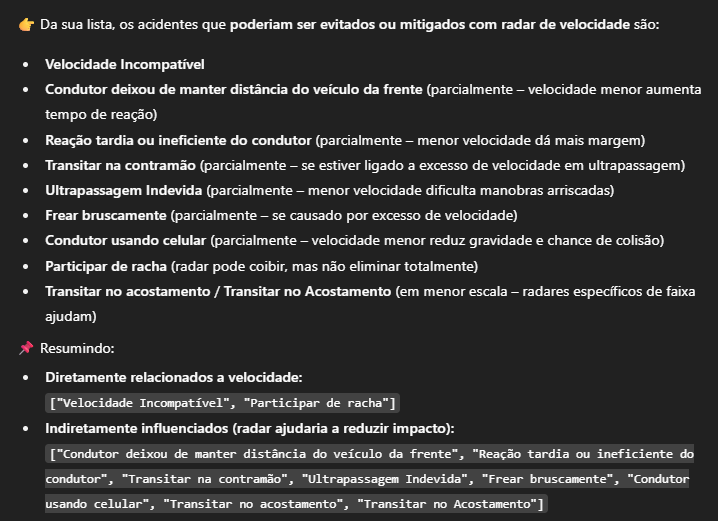

# Somente acidentes com relações de excesso de velocidade

In [43]:
# Lista de causas que poderiam ser evitadas com radar
causas_relacionadas_velocidade = [
    "Velocidade Incompatível",
    "Participar de racha",
    "Condutor deixou de manter distância do veículo da frente",
    "Reação tardia ou ineficiente do condutor",
    "Transitar na contramão",
    "Ultrapassagem Indevida",
    "Frear bruscamente",
    "Condutor usando celular",
    "Transitar no acostamento",
    "Transitar no Acostamento"
]

# Filtrar dataframe
df_2025_ocorrencia = df_2025_ocorrencia[
    df_2025_ocorrencia['causa_acidente'].isin(causas_relacionadas_velocidade)
]

# Visualizar
print(f"Total de acidentes relacionados à velocidade: {len(df_2025_ocorrencia)}")


Total de acidentes relacionados à velocidade: 21150


In [44]:
df_2025_ocorrencia.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,origem_arquivo,geometry
8,405247.0,2022-01-01,sábado,12:20:00,SC,101,"139,7",BALNEARIO CAMBORIU,Condutor deixou de manter distância do veículo...,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Aclive,Não,5,0,1,0,3,1,1,4,-27.029823,-48.601150,SPRF-SC,DEL04-SC,UOP03-DEL04-SC,datatran2022.csv,POINT (-48.60115 -27.02982)
23,405408.0,2022-01-02,domingo,08:20:00,SC,470,"204,1",PONTE ALTA,Velocidade Incompatível,Colisão lateral sentido oposto,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Curva,Não,4,0,3,0,1,0,3,2,-27.289373,-50.166328,SPRF-SC,DEL05-SC,UOP03-DEL05-SC,datatran2022.csv,POINT (-50.16633 -27.28937)
28,405442.0,2022-01-02,domingo,12:00:00,SC,116,54,PAPANDUVA,Velocidade Incompatível,Tombamento,Com Vítimas Feridas,Pleno dia,Crescente,Sol,Simples,Rotatória,Sim,4,0,2,0,1,1,2,2,-26.394484,-50.164800,SPRF-SC,DEL06-SC,UOP02-DEL06-SC,datatran2022.csv,POINT (-50.1648 -26.39448)
33,405524.0,2022-01-02,domingo,18:00:00,PR,153,"504,7",GENERAL CARNEIRO,Velocidade Incompatível,Capotamento,Com Vítimas Feridas,Anoitecer,Crescente,Céu Claro,Simples,Curva,Não,1,0,1,0,0,0,1,1,-26.515574,-51.357023,SPRF-PR,DEL02-PR,UOP03-DEL02-PR,datatran2022.csv,POINT (-51.35702 -26.51557)
39,405599.0,2022-01-03,segunda-feira,07:20:00,SC,101,120,ITAJAI,Condutor deixou de manter distância do veículo...,Colisão traseira,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Dupla,Reta,Sim,3,0,1,0,1,1,1,3,-26.912758,-48.711998,SPRF-SC,DEL04-SC,UOP04-DEL04-SC,datatran2022.csv,POINT (-48.712 -26.91276)


In [45]:
# epsg 4326 unidades são graus
# epsg 31982 unidades são metros
radares = df_radares.to_crs(epsg=31982)
acidentes = df_2025_ocorrencia.to_crs(epsg=31982)


In [46]:
radares_buffer = radares.copy()
radares_buffer['geometry'] = radares_buffer.geometry.buffer(500)  # 2000 metros ao redor de cada radar

# Agora faz o join dos acidentes que estão dentro do buffer
acidentes_proximos = gpd.sjoin(acidentes, radares_buffer, how='left', predicate='within')
radares_buffer.head()

,Código do Equipamento,Equipamento,UF,Município,Rodovia,Km,Coordenadas,Registro INMETRO,Nº de Série,ativacao_mes,ativacao_ano,longitude,latitude,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf,km_m,municipio,tipo_pista,sentido,situacao,data_da_inativacao,velocidade_leve,velocidade_pesado,geometry
0,SCB20010001,Redutor Eletrônico de Velocidade,SC,BOM RETIRO,282.0,127.960,"-49.487068, -27.803703",14794301,6042,6,2020,-49.487068,-27.803703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((649533.837 6923624.199, 649531.429 6..."
1,SCB20010002,Redutor Eletrônico de Velocidade,SC,BOM RETIRO,282.0,128.275,"-49.49019, -27.803961",14794302,6043,6,2020,-49.490190,-27.803961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((649225.907 6923599.4, 649223.499 692..."
2,SCB20010003,Redutor Eletrônico de Velocidade,SC,LAGES,282.0,215.255,"-50.282411, -27.79415",14794315,6046,6,2020,-50.282411,-27.794150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((571189.835 6925393.925, 571187.428 6..."
3,SCB20010007,Redutor Eletrônico de Velocidade,SC,LAGES,282.0,218.510,"-50.3145, -27.796972",14794310,6052,6,2020,-50.314500,-27.796972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((568026.909 6925099.364, 568024.502 6..."
4,SCB20010008,Redutor Eletrônico de Velocidade,SC,LAGES,282.0,218.550,"-50.3147, -27.797219",14794313,6053,6,2020,-50.314700,-27.797219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((568007.055 6925072.112, 568004.647 6..."


In [47]:
pd.set_option('display.max_columns', None)
acidentes_proximos.head()

,id,data_inversa,dia_semana,horario,uf_left,br,km,municipio_left,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista_left,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude_left,longitude_left,regional,delegacia,uop,origem_arquivo,geometry,index_right,Código do Equipamento,Equipamento,UF,Município,Rodovia,Km,Coordenadas,Registro INMETRO,Nº de Série,ativacao_mes,ativacao_ano,longitude_right,latitude_right,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf_right,km_m,municipio_right,tipo_pista_right,sentido,situacao,data_da_inativacao,velocidade_leve,velocidade_pesado
8,405247.0,2022-01-01,sábado,12:20:00,SC,101,"139,7",BALNEARIO CAMBORIU,Condutor deixou de manter distância do veículo...,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Aclive,Não,5,0,1,0,3,1,1,4,-27.029823,-48.601150,SPRF-SC,DEL04-SC,UOP03-DEL04-SC,datatran2022.csv,POINT (737980.628 7007996.68),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,405408.0,2022-01-02,domingo,08:20:00,SC,470,"204,1",PONTE ALTA,Velocidade Incompatível,Colisão lateral sentido oposto,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Curva,Não,4,0,3,0,1,0,3,2,-27.289373,-50.166328,SPRF-SC,DEL05-SC,UOP03-DEL05-SC,datatran2022.csv,POINT (582501.853 6981238.174),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,405442.0,2022-01-02,domingo,12:00:00,SC,116,54,PAPANDUVA,Velocidade Incompatível,Tombamento,Com Vítimas Feridas,Pleno dia,Crescente,Sol,Simples,Rotatória,Sim,4,0,2,0,1,1,2,2,-26.394484,-50.164800,SPRF-SC,DEL06-SC,UOP02-DEL06-SC,datatran2022.csv,POINT (583305.523 7080358.408),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,405524.0,2022-01-02,domingo,18:00:00,PR,153,"504,7",GENERAL CARNEIRO,Velocidade Incompatível,Capotamento,Com Vítimas Feridas,Anoitecer,Crescente,Céu Claro,Simples,Curva,Não,1,0,1,0,0,0,1,1,-26.515574,-51.357023,SPRF-PR,DEL02-PR,UOP03-DEL02-PR,datatran2022.csv,POINT (464427.226 7067168.114),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,405599.0,2022-01-03,segunda-feira,07:20:00,SC,101,120,ITAJAI,Condutor deixou de manter distância do veículo...,Colisão traseira,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Dupla,Reta,Sim,3,0,1,0,1,1,1,3,-26.912758,-48.711998,SPRF-SC,DEL04-SC,UOP04-DEL04-SC,datatran2022.csv,POINT (727215.364 7021173.368),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
acidentes_proximos['tem_radar_proximo'] = acidentes_proximos['index_right'].notnull()

In [49]:
# garantir datetime no acidente
acidentes_proximos["data_inversa"] = pd.to_datetime(
    acidentes_proximos["data_inversa"], format="%Y-%m-%d", errors="coerce"
)

# só monta a data de ativação quando ano e mês não são nulos
mask_validos = acidentes_proximos["ativacao_ano"].notna() & acidentes_proximos["ativacao_mes"].notna()

acidentes_proximos.loc[mask_validos, "data_ativacao"] = pd.to_datetime(
    acidentes_proximos.loc[mask_validos, "ativacao_ano"].astype(int).astype(str) + "-" +
    acidentes_proximos.loc[mask_validos, "ativacao_mes"].astype(int).astype(str) + "-01",
    format="%Y-%m-%d"
)

# criar coluna booleana
acidentes_proximos["radar_ativo_no_acidente"] = (
    acidentes_proximos["data_inversa"] >= acidentes_proximos["data_ativacao"]
)

# visualizar as primeiras linhas
acidentes_proximos.head()


,id,data_inversa,dia_semana,horario,uf_left,br,km,municipio_left,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista_left,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude_left,longitude_left,regional,delegacia,uop,origem_arquivo,geometry,index_right,Código do Equipamento,Equipamento,UF,Município,Rodovia,Km,Coordenadas,Registro INMETRO,Nº de Série,ativacao_mes,ativacao_ano,longitude_right,latitude_right,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf_right,km_m,municipio_right,tipo_pista_right,sentido,situacao,data_da_inativacao,velocidade_leve,velocidade_pesado,tem_radar_proximo,data_ativacao,radar_ativo_no_acidente
8,405247.0,2022-01-01,sábado,12:20:00,SC,101,"139,7",BALNEARIO CAMBORIU,Condutor deixou de manter distância do veículo...,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Aclive,Não,5,0,1,0,3,1,1,4,-27.029823,-48.601150,SPRF-SC,DEL04-SC,UOP03-DEL04-SC,datatran2022.csv,POINT (737980.628 7007996.68),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaT,False
23,405408.0,2022-01-02,domingo,08:20:00,SC,470,"204,1",PONTE ALTA,Velocidade Incompatível,Colisão lateral sentido oposto,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Curva,Não,4,0,3,0,1,0,3,2,-27.289373,-50.166328,SPRF-SC,DEL05-SC,UOP03-DEL05-SC,datatran2022.csv,POINT (582501.853 6981238.174),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaT,False
28,405442.0,2022-01-02,domingo,12:00:00,SC,116,54,PAPANDUVA,Velocidade Incompatível,Tombamento,Com Vítimas Feridas,Pleno dia,Crescente,Sol,Simples,Rotatória,Sim,4,0,2,0,1,1,2,2,-26.394484,-50.164800,SPRF-SC,DEL06-SC,UOP02-DEL06-SC,datatran2022.csv,POINT (583305.523 7080358.408),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaT,False
33,405524.0,2022-01-02,domingo,18:00:00,PR,153,"504,7",GENERAL CARNEIRO,Velocidade Incompatível,Capotamento,Com Vítimas Feridas,Anoitecer,Crescente,Céu Claro,Simples,Curva,Não,1,0,1,0,0,0,1,1,-26.515574,-51.357023,SPRF-PR,DEL02-PR,UOP03-DEL02-PR,datatran2022.csv,POINT (464427.226 7067168.114),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaT,False
39,405599.0,2022-01-03,segunda-feira,07:20:00,SC,101,120,ITAJAI,Condutor deixou de manter distância do veículo...,Colisão traseira,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Dupla,Reta,Sim,3,0,1,0,1,1,1,3,-26.912758,-48.711998,SPRF-SC,DEL04-SC,UOP04-DEL04-SC,datatran2022.csv,POINT (727215.364 7021173.368),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaT,False


In [50]:
# porcentagem de radares ativos no momento do acidente
porcentagem_ativos = acidentes_proximos["radar_ativo_no_acidente"].mean() * 100

print(f"Porcentagem de radares ativos próximos dos acidentes: {porcentagem_ativos:.2f}%")


Porcentagem de radares ativos próximos dos acidentes: 14.11%


In [51]:
acidentes_proximos.head()

,id,data_inversa,dia_semana,horario,uf_left,br,km,municipio_left,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista_left,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude_left,longitude_left,regional,delegacia,uop,origem_arquivo,geometry,index_right,Código do Equipamento,Equipamento,UF,Município,Rodovia,Km,Coordenadas,Registro INMETRO,Nº de Série,ativacao_mes,ativacao_ano,longitude_right,latitude_right,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf_right,km_m,municipio_right,tipo_pista_right,sentido,situacao,data_da_inativacao,velocidade_leve,velocidade_pesado,tem_radar_proximo,data_ativacao,radar_ativo_no_acidente
8,405247.0,2022-01-01,sábado,12:20:00,SC,101,"139,7",BALNEARIO CAMBORIU,Condutor deixou de manter distância do veículo...,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Aclive,Não,5,0,1,0,3,1,1,4,-27.029823,-48.601150,SPRF-SC,DEL04-SC,UOP03-DEL04-SC,datatran2022.csv,POINT (737980.628 7007996.68),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaT,False
23,405408.0,2022-01-02,domingo,08:20:00,SC,470,"204,1",PONTE ALTA,Velocidade Incompatível,Colisão lateral sentido oposto,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Curva,Não,4,0,3,0,1,0,3,2,-27.289373,-50.166328,SPRF-SC,DEL05-SC,UOP03-DEL05-SC,datatran2022.csv,POINT (582501.853 6981238.174),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaT,False
28,405442.0,2022-01-02,domingo,12:00:00,SC,116,54,PAPANDUVA,Velocidade Incompatível,Tombamento,Com Vítimas Feridas,Pleno dia,Crescente,Sol,Simples,Rotatória,Sim,4,0,2,0,1,1,2,2,-26.394484,-50.164800,SPRF-SC,DEL06-SC,UOP02-DEL06-SC,datatran2022.csv,POINT (583305.523 7080358.408),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaT,False
33,405524.0,2022-01-02,domingo,18:00:00,PR,153,"504,7",GENERAL CARNEIRO,Velocidade Incompatível,Capotamento,Com Vítimas Feridas,Anoitecer,Crescente,Céu Claro,Simples,Curva,Não,1,0,1,0,0,0,1,1,-26.515574,-51.357023,SPRF-PR,DEL02-PR,UOP03-DEL02-PR,datatran2022.csv,POINT (464427.226 7067168.114),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaT,False
39,405599.0,2022-01-03,segunda-feira,07:20:00,SC,101,120,ITAJAI,Condutor deixou de manter distância do veículo...,Colisão traseira,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Dupla,Reta,Sim,3,0,1,0,1,1,1,3,-26.912758,-48.711998,SPRF-SC,DEL04-SC,UOP04-DEL04-SC,datatran2022.csv,POINT (727215.364 7021173.368),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaT,False


In [52]:
# Quantidade total de acidentes
total = len(acidentes_proximos)
print(total)

22555


In [53]:
# Quantidade de acidentes que NÃO têm radar próximo
sem_radar = (~acidentes_proximos['tem_radar_proximo']).sum()

# Porcentagem de acidentes sem radar próximo
percentual_sem_radar = (sem_radar / total) * 100

print(f"{percentual_sem_radar:.2f}% dos acidentes ocorreram longe de radares")

80.62% dos acidentes ocorreram longe de radares


# Considerando apenas os acidentes com mortos

In [55]:
acidentes_mortais = acidentes_proximos[acidentes_proximos['mortos'] >= 1]
acidentes_mortais.head()

,id,data_inversa,dia_semana,horario,uf_left,br,km,municipio_left,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista_left,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude_left,longitude_left,regional,delegacia,uop,origem_arquivo,geometry,index_right,Código do Equipamento,Equipamento,UF,Município,Rodovia,Km,Coordenadas,Registro INMETRO,Nº de Série,ativacao_mes,ativacao_ano,longitude_right,latitude_right,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf_right,km_m,municipio_right,tipo_pista_right,sentido,situacao,data_da_inativacao,velocidade_leve,velocidade_pesado,tem_radar_proximo,data_ativacao,radar_ativo_no_acidente
103,405924.0,2022-01-04,terça-feira,08:20:00,PR,277,402,CANDOI,Ultrapassagem Indevida,Colisão frontal,Com Vítimas Fatais,Pleno dia,Decrescente,Nublado,Simples,Curva,Não,6,1,0,1,0,5,1,5,-25.455064,-51.945903,SPRF-PR,DEL08-PR,UOP01-DEL08-PR,datatran2022.csv,POINT (404901.013 7184324.742),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaT,False
139,406123.0,2022-01-05,quarta-feira,16:00:00,RS,470,42,SAO JOSE DO OURO,Ultrapassagem Indevida,Colisão frontal,Com Vítimas Fatais,Pleno dia,Crescente,Nublado,Simples,Reta,Não,6,2,1,0,2,5,1,9,-27.830547,-51.440107,SPRF-RS,DEL08-RS,UOP05-DEL08-RS,datatran2022.csv,POINT (456659.802 6921490.88),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaT,False
267,407504.0,2022-01-08,sábado,09:10:00,RS,386,"234,7",SOLEDADE,Ultrapassagem Indevida,Colisão frontal,Com Vítimas Fatais,Pleno dia,Crescente,Céu Claro,Simples,Curva,Não,19,2,3,0,13,1,3,4,-28.722898,-52.560581,SPRF-RS,DEL04-RS,UOP03-DEL04-RS,datatran2022.csv,POINT (347585.682 6821716.605),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaT,False
443,408416.0,2022-01-13,quinta-feira,15:50:00,SC,282,179,BOCAINA DO SUL,Ultrapassagem Indevida,Colisão lateral mesmo sentido,Com Vítimas Fatais,Pleno dia,Decrescente,Sol,Simples,Curva,Não,5,1,1,1,1,1,2,3,-27.739967,-49.932175,SPRF-SC,DEL05-SC,UOP01-DEL05-SC,datatran2022.csv,POINT (605245.71 6931145.8),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaT,False
449,408469.0,2022-01-13,quinta-feira,21:15:00,RS,158,"309,9",ITAARA,Transitar na contramão,Colisão frontal,Com Vítimas Fatais,Plena Noite,Crescente,Céu Claro,Simples,Aclive;Reta,Sim,4,1,0,0,2,1,0,3,-29.603897,-53.766353,SPRF-RS,DEL09-RS,UOP01-DEL09-RS,datatran2022.csv,POINT (232084.809 6721908.115),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaT,False


In [56]:
# Quantidade total de acidentes
total = len(acidentes_mortais)
print(total)

1565


In [82]:
total_acidentes = len(acidentes_proximos)
print(total_acidentes)


22555


In [73]:

# Quantidade de acidentes que NÃO têm radar próximo
sem_radar = (~acidentes_mortais['tem_radar_proximo']).sum()

# Porcentagem de acidentes sem radar próximo
percentual_sem_radar = (sem_radar / total) * 100

print(f"{percentual_sem_radar:.2f}% dos acidentes com morte ocorreram longe de radares")

89.01% dos acidentes com morte ocorreram longe de radares


In [83]:

# Quantidade de acidentes que NÃO têm radar próximo
sem_radar = (~acidentes_proximos['tem_radar_proximo']).sum()

# Porcentagem de acidentes sem radar próximo
percentual_sem_radar = (sem_radar / total_acidentes) * 100

print(f"{percentual_sem_radar:.2f}% dos acidentes com morte ocorreram longe de radares")

80.62% dos acidentes com morte ocorreram longe de radares


In [74]:
acidentes_mortais['km'] = acidentes_mortais['km'].str.replace(',', '.', regex=False).astype(float)
acidentes_mortais.head()

c:\Users\adria\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1981: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,id,data_inversa,dia_semana,horario,uf_left,br,km,municipio_left,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista_left,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude_left,longitude_left,regional,delegacia,uop,origem_arquivo,geometry,index_right,Código do Equipamento,Equipamento,UF,Município,Rodovia,Km,Coordenadas,Registro INMETRO,Nº de Série,ativacao_mes,ativacao_ano,longitude_right,latitude_right,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf_right,km_m,municipio_right,tipo_pista_right,sentido,situacao,data_da_inativacao,velocidade_leve,velocidade_pesado,tem_radar_proximo,data_ativacao,radar_ativo_no_acidente
103,405924.0,2022-01-04,terça-feira,08:20:00,PR,277,402.0,CANDOI,Ultrapassagem Indevida,Colisão frontal,Com Vítimas Fatais,Pleno dia,Decrescente,Nublado,Simples,Curva,Não,6,1,0,1,0,5,1,5,-25.455064,-51.945903,SPRF-PR,DEL08-PR,UOP01-DEL08-PR,datatran2022.csv,POINT (404901.013 7184324.742),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaT,False
139,406123.0,2022-01-05,quarta-feira,16:00:00,RS,470,42.0,SAO JOSE DO OURO,Ultrapassagem Indevida,Colisão frontal,Com Vítimas Fatais,Pleno dia,Crescente,Nublado,Simples,Reta,Não,6,2,1,0,2,5,1,9,-27.830547,-51.440107,SPRF-RS,DEL08-RS,UOP05-DEL08-RS,datatran2022.csv,POINT (456659.802 6921490.88),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaT,False
267,407504.0,2022-01-08,sábado,09:10:00,RS,386,234.7,SOLEDADE,Ultrapassagem Indevida,Colisão frontal,Com Vítimas Fatais,Pleno dia,Crescente,Céu Claro,Simples,Curva,Não,19,2,3,0,13,1,3,4,-28.722898,-52.560581,SPRF-RS,DEL04-RS,UOP03-DEL04-RS,datatran2022.csv,POINT (347585.682 6821716.605),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaT,False
443,408416.0,2022-01-13,quinta-feira,15:50:00,SC,282,179.0,BOCAINA DO SUL,Ultrapassagem Indevida,Colisão lateral mesmo sentido,Com Vítimas Fatais,Pleno dia,Decrescente,Sol,Simples,Curva,Não,5,1,1,1,1,1,2,3,-27.739967,-49.932175,SPRF-SC,DEL05-SC,UOP01-DEL05-SC,datatran2022.csv,POINT (605245.71 6931145.8),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaT,False
449,408469.0,2022-01-13,quinta-feira,21:15:00,RS,158,309.9,ITAARA,Transitar na contramão,Colisão frontal,Com Vítimas Fatais,Plena Noite,Crescente,Céu Claro,Simples,Aclive;Reta,Sim,4,1,0,0,2,1,0,3,-29.603897,-53.766353,SPRF-RS,DEL09-RS,UOP01-DEL09-RS,datatran2022.csv,POINT (232084.809 6721908.115),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaT,False


In [84]:
acidentes_proximos['km'] = acidentes_proximos['km'].str.replace(',', '.', regex=False).astype(float)
acidentes_proximos.head()

,id,data_inversa,dia_semana,horario,uf_left,br,km,municipio_left,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista_left,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude_left,longitude_left,regional,delegacia,uop,origem_arquivo,geometry,index_right,Código do Equipamento,Equipamento,UF,Município,Rodovia,Km,Coordenadas,Registro INMETRO,Nº de Série,ativacao_mes,ativacao_ano,longitude_right,latitude_right,concessionaria,ano_do_pnv_snv,tipo_de_radar,rodovia,uf_right,km_m,municipio_right,tipo_pista_right,sentido,situacao,data_da_inativacao,velocidade_leve,velocidade_pesado,tem_radar_proximo,data_ativacao,radar_ativo_no_acidente
8,405247.0,2022-01-01,sábado,12:20:00,SC,101,139.7,BALNEARIO CAMBORIU,Condutor deixou de manter distância do veículo...,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Aclive,Não,5,0,1,0,3,1,1,4,-27.029823,-48.601150,SPRF-SC,DEL04-SC,UOP03-DEL04-SC,datatran2022.csv,POINT (737980.628 7007996.68),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaT,False
23,405408.0,2022-01-02,domingo,08:20:00,SC,470,204.1,PONTE ALTA,Velocidade Incompatível,Colisão lateral sentido oposto,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Curva,Não,4,0,3,0,1,0,3,2,-27.289373,-50.166328,SPRF-SC,DEL05-SC,UOP03-DEL05-SC,datatran2022.csv,POINT (582501.853 6981238.174),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaT,False
28,405442.0,2022-01-02,domingo,12:00:00,SC,116,54.0,PAPANDUVA,Velocidade Incompatível,Tombamento,Com Vítimas Feridas,Pleno dia,Crescente,Sol,Simples,Rotatória,Sim,4,0,2,0,1,1,2,2,-26.394484,-50.164800,SPRF-SC,DEL06-SC,UOP02-DEL06-SC,datatran2022.csv,POINT (583305.523 7080358.408),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaT,False
33,405524.0,2022-01-02,domingo,18:00:00,PR,153,504.7,GENERAL CARNEIRO,Velocidade Incompatível,Capotamento,Com Vítimas Feridas,Anoitecer,Crescente,Céu Claro,Simples,Curva,Não,1,0,1,0,0,0,1,1,-26.515574,-51.357023,SPRF-PR,DEL02-PR,UOP03-DEL02-PR,datatran2022.csv,POINT (464427.226 7067168.114),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaT,False
39,405599.0,2022-01-03,segunda-feira,07:20:00,SC,101,120.0,ITAJAI,Condutor deixou de manter distância do veículo...,Colisão traseira,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Dupla,Reta,Sim,3,0,1,0,1,1,1,3,-26.912758,-48.711998,SPRF-SC,DEL04-SC,UOP04-DEL04-SC,datatran2022.csv,POINT (727215.364 7021173.368),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaT,False


In [75]:
acidentes_mortais['br'].value_counts()

br
277    218
116    151
470    146
282    144
376    130
101    105
153     74
369     71
386     64
280     60
476     55
163     52
285     51
290     50
373     47
392     36
158     32
472     19
468     10
293     10
287     10
272      9
471      7
487      4
448      4
467      3
0        2
480      1
Name: count, dtype: int64

In [76]:
df_grouped = acidentes_mortais.groupby(['br', 'km'])['mortos'].sum().reset_index()
df_grouped.head(200)

,br,km,mortos
0,0,0.0,2
1,101,5.6,1
2,101,9.5,1
3,101,21.9,2
4,101,22.5,1
...,...,...,...
195,116,202.4,1
196,116,204.5,1
197,116,209.3,1
198,116,210.4,1


In [85]:
df_grouped_acidentes = acidentes_proximos.groupby(['br', 'km'])['mortos'].sum().reset_index()
df_grouped_acidentes.head(200)

,br,km,mortos
0,0,0.0,2
1,101,0.0,0
2,101,0.3,0
3,101,0.5,0
4,101,1.0,0
...,...,...,...
195,101,47.9,0
196,101,48.0,0
197,101,48.3,0
198,101,48.4,0


In [77]:
# Suponha que df já tem as colunas: 'br', 'km', 'mortos'
# Exemplo de valor ajustável para agrupamento de km:
agrupamento_km = 5  # pode ser 1, 2, 5, 10, etc.

# Cria uma nova coluna de "faixa de km"
df_grouped['km_faixa'] = (df_grouped['km'] // agrupamento_km) * agrupamento_km

# Agrupa por BR e pela faixa de km
df_agrupado = (
    df_grouped.groupby(['br', 'km_faixa'], as_index=False)
      .agg(
          qtd_acidentes=('mortos', 'count'),
          qtd_mortos=('mortos', 'sum')
      )
      .sort_values(['br', 'km_faixa'])
)

df_agrupado.head(200)


,br,km_faixa,qtd_acidentes,qtd_mortos
0,0,0.0,1,2
1,101,5.0,2,2
2,101,20.0,2,3
3,101,35.0,1,2
4,101,40.0,2,2
...,...,...,...,...
195,163,60.0,1,1
196,163,70.0,1,1
197,163,75.0,1,4
198,163,80.0,1,1


In [86]:
# Suponha que df já tem as colunas: 'br', 'km', 'mortos'
# Exemplo de valor ajustável para agrupamento de km:
agrupamento_km = 5  # pode ser 1, 2, 5, 10, etc.

# Cria uma nova coluna de "faixa de km"
df_grouped_acidentes['km_faixa'] = (df_grouped_acidentes['km'] // agrupamento_km) * agrupamento_km

# Agrupa por BR e pela faixa de km
df_agrupado_acidentes = (
    df_grouped_acidentes.groupby(['br', 'km_faixa'], as_index=False)
      .agg(
          qtd_acidentes=('mortos', 'count'),
          qtd_mortos=('mortos', 'sum')
      )
      .sort_values(['br', 'km_faixa'])
)

df_agrupado_acidentes.head(200)


,br,km_faixa,qtd_acidentes,qtd_mortos
0,0,0.0,1,2
1,101,0.0,23,0
2,101,5.0,16,2
3,101,10.0,20,0
4,101,15.0,15,0
...,...,...,...,...
195,116,610.0,4,1
196,116,615.0,1,0
197,116,645.0,1,0
198,116,650.0,1,0


In [78]:
df_agrupado = df_agrupado.sort_values('qtd_acidentes', ascending=False)
df_agrupado.head(200)

,br,km_faixa,qtd_acidentes,qtd_mortos
232,277,0.0,8,9
802,470,125.0,6,8
787,470,45.0,6,10
794,470,80.0,6,8
83,116,155.0,6,7
...,...,...,...,...
430,282,490.0,2,3
427,282,470.0,2,2
663,376,360.0,2,3
424,282,450.0,2,3


In [87]:
df_agrupado_acidentes = df_agrupado_acidentes.sort_values('qtd_acidentes', ascending=False)
df_agrupado_acidentes.head(200)

,br,km_faixa,qtd_acidentes,qtd_mortos
43,101,210.0,48,4
42,101,205.0,47,7
671,282,0.0,45,4
41,101,200.0,45,7
40,101,195.0,42,2
...,...,...,...,...
595,277,660.0,14,2
87,101,430.0,14,0
640,280,150.0,14,2
714,282,220.0,14,0


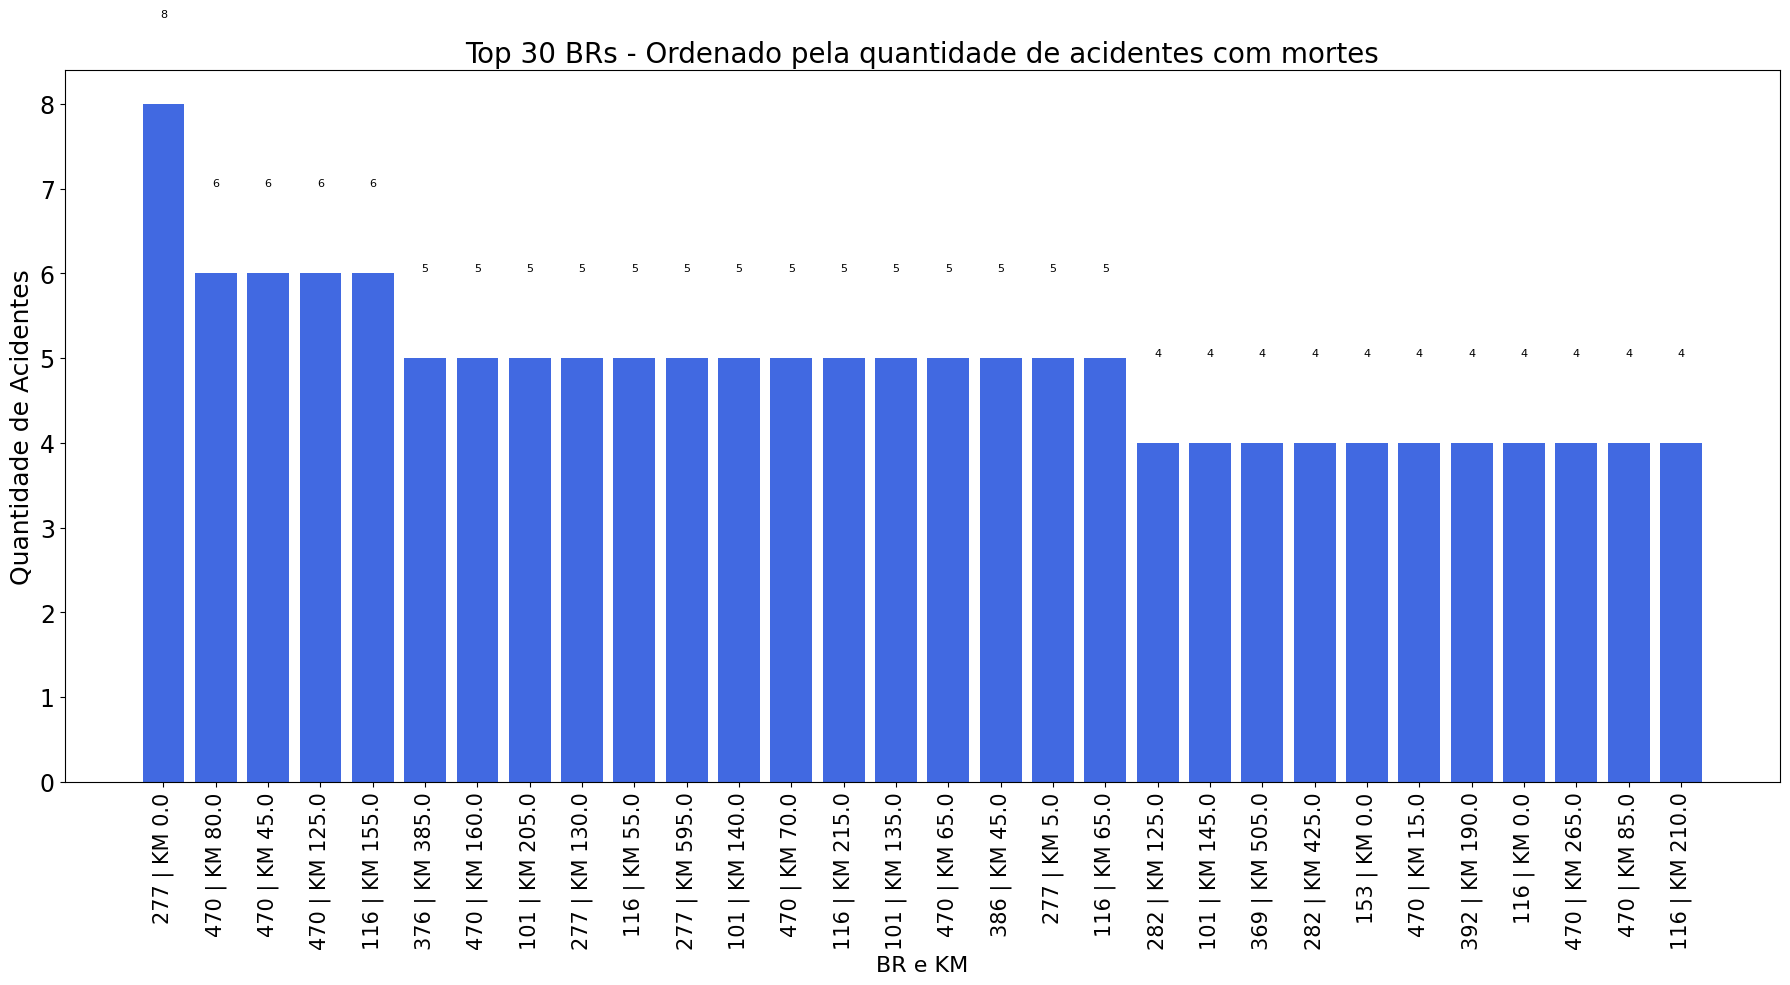

In [89]:
import matplotlib.pyplot as plt
df_agrupado['br_km'] = df_agrupado['br'].astype(str) + ' | KM ' + df_agrupado['km_faixa'].astype(str)

# Selecionar os 50 primeiros após ordenação
top_30 = df_agrupado.sort_values('qtd_acidentes', ascending=False).head(30)

plt.figure(figsize=(18, 10))
bars = plt.bar(top_30['br_km'], top_30['qtd_acidentes'], color='royalblue')

# Adicionar rótulos com os valores
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{int(height)}', 
             ha='center', va='bottom', fontsize=8)

# Ajustar rótulos e título com tamanhos maiores
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=17)
plt.xlabel('BR e KM', fontsize=16)
plt.ylabel('Quantidade de Acidentes', fontsize=18)
plt.title('Top 30 BRs - Ordenado pela quantidade de acidentes com mortes', fontsize=20)
plt.tight_layout()
plt.show()

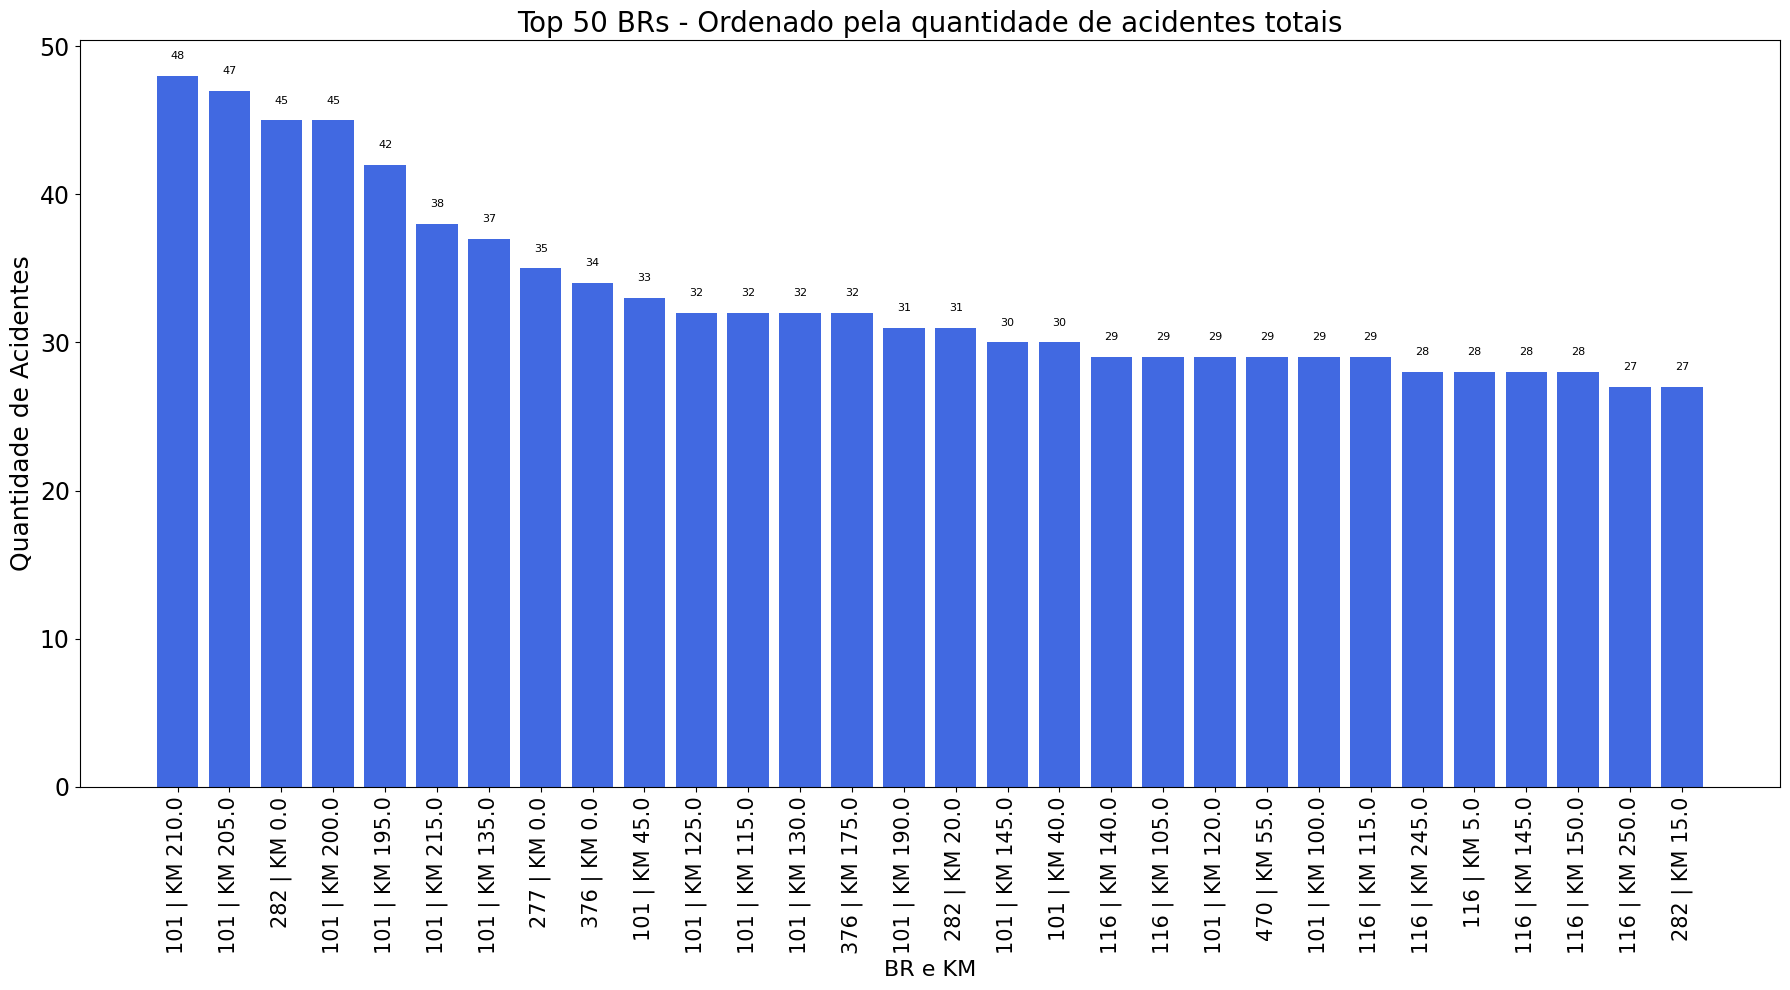

In [90]:
import matplotlib.pyplot as plt
df_agrupado_acidentes['br_km'] = df_agrupado_acidentes['br'].astype(str) + ' | KM ' + df_agrupado_acidentes['km_faixa'].astype(str)

# Selecionar os 50 primeiros após ordenação
top_30 = df_agrupado_acidentes.sort_values('qtd_acidentes', ascending=False).head(30)

plt.figure(figsize=(18, 10))
bars = plt.bar(top_30['br_km'], top_30['qtd_acidentes'], color='royalblue')

# Adicionar rótulos com os valores
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{int(height)}', 
             ha='center', va='bottom', fontsize=8)

# Ajustar rótulos e título com tamanhos maiores
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=17)
plt.xlabel('BR e KM', fontsize=16)
plt.ylabel('Quantidade de Acidentes', fontsize=18)
plt.title('Top 50 BRs - Ordenado pela quantidade de acidentes totais', fontsize=20)
plt.tight_layout()
plt.show()

In [80]:
df_agrupado = df_agrupado.sort_values('qtd_mortos', ascending=False)
df_agrupado.head(200)

,br,km_faixa,qtd_acidentes,qtd_mortos,br_km
695,376,665.0,4,24,376 | KM 665.0
593,369,505.0,4,10,369 | KM 505.0
787,470,45.0,6,10,470 | KM 45.0
232,277,0.0,8,9,277 | KM 0.0
684,376,545.0,2,8,376 | KM 545.0
...,...,...,...,...,...
779,470,5.0,3,3,470 | KM 5.0
103,116,305.0,3,3,116 | KM 305.0
788,470,50.0,2,3,470 | KM 50.0
515,290,125.0,2,3,290 | KM 125.0


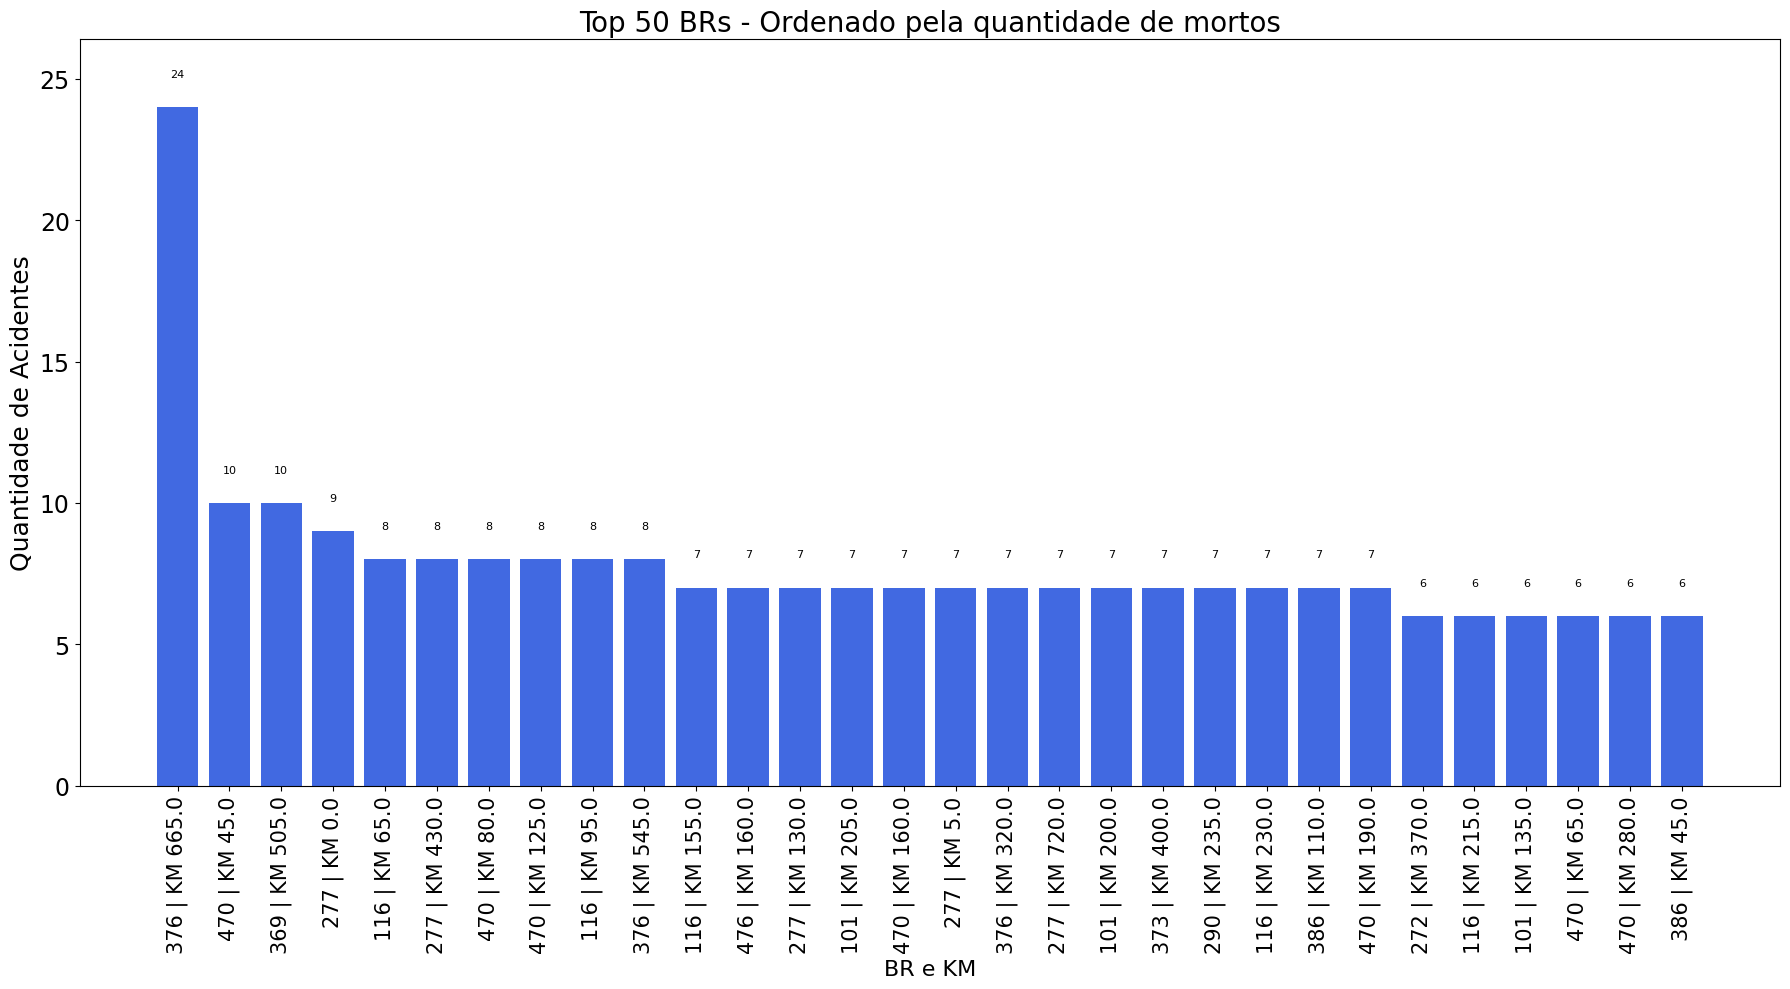

In [81]:
# Selecionar os 50 primeiros após ordenação
top_30 = df_agrupado.sort_values('qtd_mortos', ascending=False).head(30)

plt.figure(figsize=(18, 10))
bars = plt.bar(top_30['br_km'], top_30['qtd_mortos'], color='royalblue')

# Adicionar rótulos com os valores
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{int(height)}', 
             ha='center', va='bottom', fontsize=8)
max_valor = top_30['qtd_mortos'].max()
plt.ylim(0, max_valor * 1.1)

# Ajustar rótulos e título com tamanhos maiores
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=17)
plt.xlabel('BR e KM', fontsize=16)
plt.ylabel('Quantidade de Acidentes', fontsize=18)
plt.title('Top 50 BRs - Ordenado pela quantidade de mortos', fontsize=20)
plt.tight_layout()
plt.show()